kin_df
   elev    shp    rie   elb             time        date
0  9.16  37.75  666.0  9.10  07:17:44.812000  2006-04-23
1  9.15  37.71  666.0  9.11  07:17:44.845000  2006-04-23
2  9.14  37.75  666.0  9.12  07:17:44.879000  2006-04-23
3  9.12  37.79  666.0  9.13  07:17:44.912000  2006-04-23
4  9.12  37.78  666.0  9.13  07:17:44.944000  2006-04-23

mp_df
    elev    shp    rie   elb             time        date
0  15.29  80.63 -13.06  6.67  15:17:43.853000  2006-04-23
1  15.24  80.63 -13.11  6.75  15:17:43.953000  2006-04-23
2  15.19  80.63 -13.14  6.79  15:17:44.068000  2006-04-23
3  15.07  80.60 -13.24  6.90  15:17:44.166000  2006-04-23
4  15.01  80.58 -13.28  6.94  15:17:44.263000  2006-04-23
kin_df
   elev    shp    rie   elb             time        date
0  9.16  37.75  666.0  9.10  15:17:44.812000  2006-04-23
1  9.15  37.71  666.0  9.11  15:17:44.845000  2006-04-23
2  9.14  37.75  666.0  9.12  15:17:44.879000  2006-04-23
3  9.12  37.79  666.0  9.13  15:17:44.912000  2006-04-23
4  9

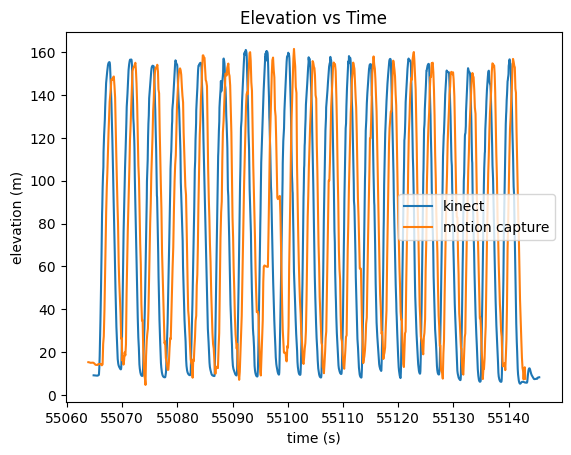

In [8]:
import os

# read the .txt file to get the data from "/kinFiles/14/kin-elbrest-abd-add-06-04-23-07-17-44.txt"
# current working directory
cwd = os.getcwd()
kin_file_path = cwd + "/DataFolder/kinFiles/14/kin-elbrest-abd-add-06-04-23-07-17-44.txt"
mp_file_path = cwd + "/DataFolder/mpFiles/elbrest-abd-add-06-04-2023-15-17-34/analysis/elbrest-abd-add-06-04-2023-15-17-34.csv"

# read the kin file into a DataFrame
import pandas as pd
kin_df = pd.read_csv(kin_file_path, sep=',', header=None)
kin_df.columns = ['elev', 'shp', 'rie', 'elb', 'time']
# print("kin_df")
# print(kin_df.head())
# print()
# print("mp_df")
# read the mp file into a DataFrame
mp_df = pd.read_csv(mp_file_path, sep=',', header=None)
mp_df.columns = ['elev', 'shp', 'time', 'elb', 'rie']
# print(mp_df.head())
# convert datetime from 06-04-23-07-17-44-812 to 06-04-23-15-17-44-812 and create a new column for date
kin_df['time'] = pd.to_datetime(kin_df['time'], format='%y-%m-%d-%H-%M-%S-%f')

# separate the date and time into two columns
kin_df['date'] = [d.date() for d in kin_df['time']]
kin_df['time'] = [d.time() for d in kin_df['time']]
print("kin_df")
print(kin_df.head())
print()
print("mp_df")
# convert the time in mp_df from to %H-%M-%S-%f 
mp_df['time'] = pd.to_datetime(mp_df['time'], format='%H-%M-%S-%f')
mp_df['time'] = [d.time() for d in mp_df['time']]
mp_df['date'] = ["2006-04-23" for d in mp_df['time']]
# rearrange the columns to match kin_df
mp_df = mp_df[['elev', 'shp', 'rie', 'elb', 'time', 'date']]
print(mp_df.head())

# make the hour in kin_df the same as mp_df
kin_df['time'] = [d.replace(hour=15) for d in kin_df['time']]
print("kin_df")
print(kin_df.head())
print()
print("mp_df")
print(mp_df.head())

# # convert 15:17:43.853000 to seconds
# secs = 15*3600 + 17*60 + 43 + 853 * 0.001
# print(secs)


# convert time into a number in soconds with microseconds in decimal
kin_df['time'] = [d.hour*3600 + d.minute*60 + d.second + d.microsecond * 0.001 * 0.001 for d in kin_df['time']]
mp_df['time'] = [d.hour*3600 + d.minute*60 + d.second + d.microsecond * 0.001 * 0.001 for d in mp_df['time']]
print("kin_df")
print(kin_df.head())
print()
print("mp_df")
print(mp_df.head())


# plot time vs elev
import matplotlib.pyplot as plt
plt.plot(kin_df['time'], kin_df['elev'], label='kinect')
plt.plot(mp_df['time'], mp_df['elev'], label='motion capture')
plt.xlabel('time (s)')
plt.ylabel('elevation (m)')
plt.title('Elevation vs Time')
plt.legend()
plt.show()

In [9]:
# # get current utc time
# import datetime
# utc_now = datetime.datetime.utcnow()
# print(utc_now)

# # get current local time
# import time
# localtime = time.localtime(time.time())
# # format the lcoal time
# localtime = time.strftime("%Y-%m-%d %H:%M:%S", localtime)
# print(localtime)

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_elevation_vs_time(kin_file_path, mp_file_path):
    # Read kin file into a DataFrame
    kin_df = pd.read_csv(kin_file_path, sep=',', header=None)
    kin_df.columns = ['elev', 'shp', 'rie', 'elb', 'time']

    # Read mp file into a DataFrame
    mp_df = pd.read_csv(mp_file_path, sep=',', header=None)
    mp_df.columns = ['elev', 'shp', 'time', 'elb', 'rie']

    # Convert datetime format
    kin_df['time'] = pd.to_datetime(kin_df['time'], format='%y-%m-%d-%H-%M-%S-%f')
    mp_df['time'] = pd.to_datetime(mp_df['time'], format='%H-%M-%S-%f')

    # Separate date and time into two columns in kin_df
    kin_df['date'] = kin_df['time'].dt.date
    kin_df['time'] = kin_df['time'].dt.time

    # Set the same hour in kin_df as in mp_df
    kin_df['time'] = kin_df['time'].apply(lambda x: x.replace(hour=15))

    # Convert time to seconds with microseconds
    kin_df['time'] = kin_df['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond * 0.001 * 0.001)
    mp_df['time'] = mp_df['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second + x.microsecond * 0.001 * 0.001)

    # Plot time vs elevation
    plt.plot(kin_df['time'], kin_df['elev'], label='kinect')
    plt.plot(mp_df['time'], mp_df['elev'], label='motion capture')
    plt.xlabel('time (s)')
    plt.ylabel('elevation (m)')
    plt.title('Elevation vs Time')
    plt.legend()
    plt.show()

    return kin_df, mp_df


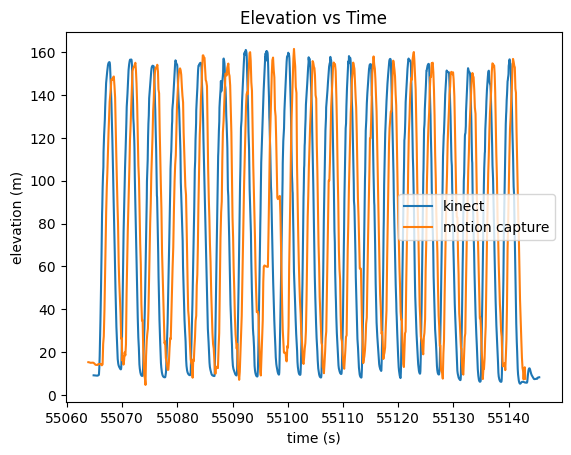

In [13]:
kin_file_path = os.path.join(os.getcwd(), "DataFolder/kinFiles/14/kin-elbrest-abd-add-06-04-23-07-17-44.txt")
mp_file_path = os.path.join(os.getcwd(), "DataFolder/mpFiles/elbrest-abd-add-06-04-2023-15-17-34/analysis/elbrest-abd-add-06-04-2023-15-17-34.csv")

kin_df_new, mp_df_new =  plot_elevation_vs_time(kin_file_path, mp_file_path)

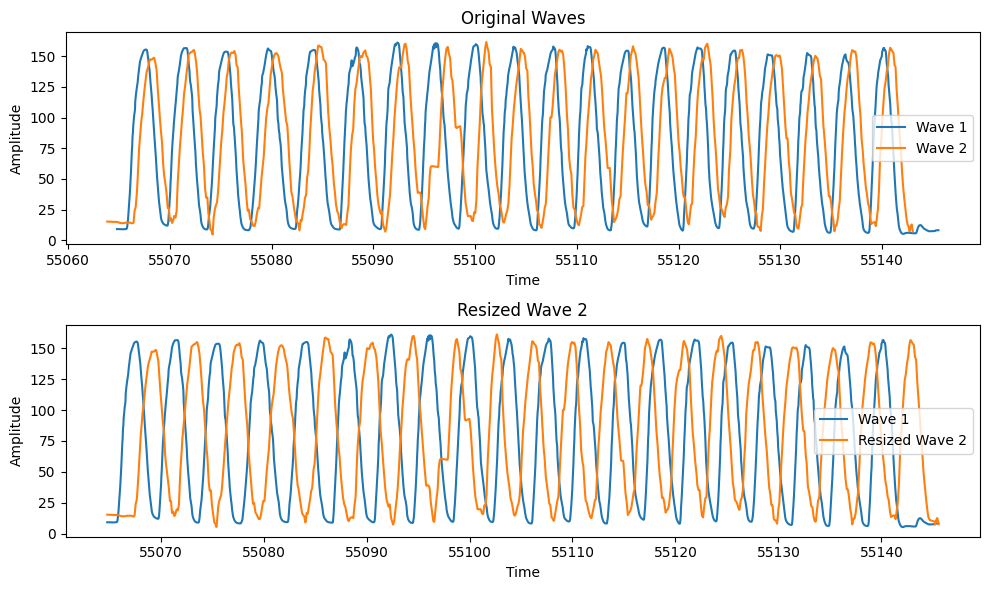

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

def resize_waveform(waveform, size):
    t = np.linspace(0, 1, size)
    resized_waveform = np.interp(t, np.linspace(0, 1, len(waveform)), waveform)
    return resized_waveform

def plot_waveform_comparison(df1, df2):
    # Extract time and elevation values from dataframes
    t1 = df1['time'].values
    wave1 = df1['elev'].values
    t2 = df2['time'].values
    wave2 = df2['elev'].values

    # Perform Dynamic Time Warping (DTW)
    distance, path = fastdtw(wave1, wave2)

    # Find the indices for resizing wave2
    start_index = path[0][1]
    end_index = path[-1][1] + 1  # Add 1 to include the end index

    # Resize wave2 using the alignment indices
    resized_wave2 = resize_waveform(wave2[start_index:end_index], len(wave1))

    # Plotting the original waves and the resized wave
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t1, wave1, label='Wave 1')
    plt.plot(t2, wave2, label='Wave 2')
    plt.title('Original Waves')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(t1, wave1, label='Wave 1')
    plt.plot(t1, resized_wave2, label='Resized Wave 2')
    plt.title('Resized Wave 2')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

# two sine waves with different frequencies but same number of waves
t1 = np.linspace(0, 1, 1000)
wave1 = np.sin(2 * np.pi * 10 * t1)
t2 = np.linspace(0, 10, 1000)
wave2 = np.sin(2 * np.pi * 1 * t2)

df1 = pd.DataFrame({'time': t1, 'elev': wave1})
df2 = pd.DataFrame({'time': t2, 'elev': wave2})



plot_waveform_comparison(kin_df_new, mp_df_new)

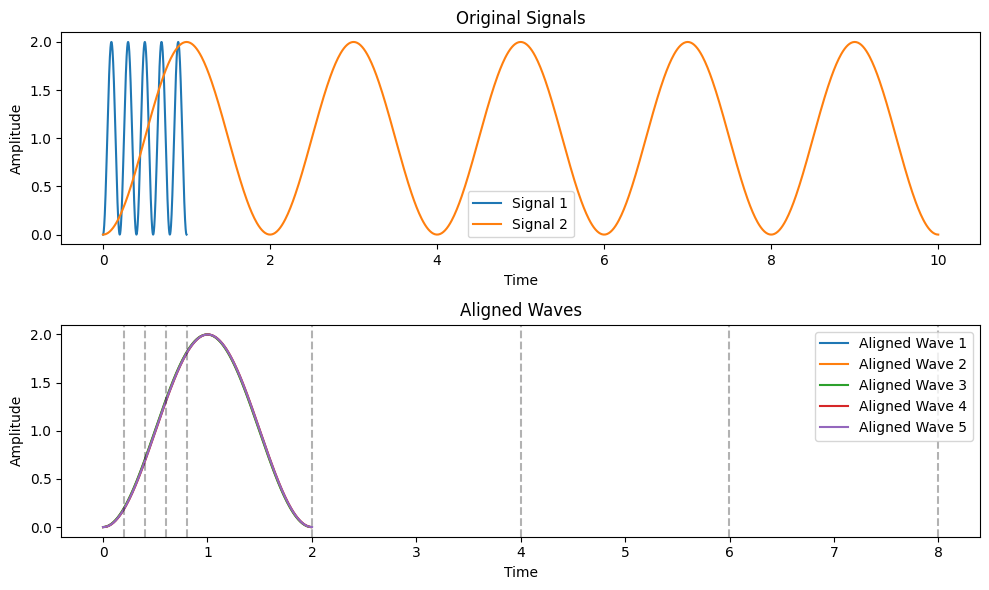

In [15]:
import numpy as np
from scipy.signal import find_peaks
from fastdtw import fastdtw

def align_periodic_signals(signal1, signal2):
    # Find troughs in the signals
    troughs1, _ = find_peaks(-signal1)
    troughs2, _ = find_peaks(-signal2)
    
    # Slice signals into individual waves
    waves1 = np.split(signal1, troughs1)
    waves2 = np.split(signal2, troughs2)
    
    # Perform DTW between individual waves
    aligned_waves2 = []
    for wave1 in waves1:
        min_distance = float('inf')
        aligned_wave2 = None
        
        for wave2 in waves2:
            distance, _ = fastdtw(wave1, wave2)
            
            if distance < min_distance:
                min_distance = distance
                aligned_wave2 = wave2
        
        aligned_waves2.append(aligned_wave2)
    
    return aligned_waves2, troughs1, troughs2

# Example periodic signals

t1 = np.linspace(0, 1, 1000)
signal1 = 1- np.cos(2 * np.pi * 5 * t1)
t2 = np.linspace(0, 10, 1000)
signal2 = 1- np.cos(2 * np.pi * 0.5 * t2)

# Align the individual waves
aligned_waves2, troughs1, troughs2 = align_periodic_signals(signal1, signal2)

# Plotting the original signals and aligned waves
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t1, signal1, label='Signal 1')
plt.plot(t2, signal2, label='Signal 2')
plt.title('Original Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
for i, wave2 in enumerate(aligned_waves2):
    plt.plot(t2[:len(wave2)], wave2, label=f'Aligned Wave {i+1}')
plt.title('Aligned Waves')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()

# draw vertical lines to show the alignment
for trough in troughs1:
    plt.axvline(x=t1[trough], color='black', linestyle='--', alpha=0.3)
for trough in troughs2:
    plt.axvline(x=t2[trough], color='black', linestyle='--', alpha=0.3)


plt.show()


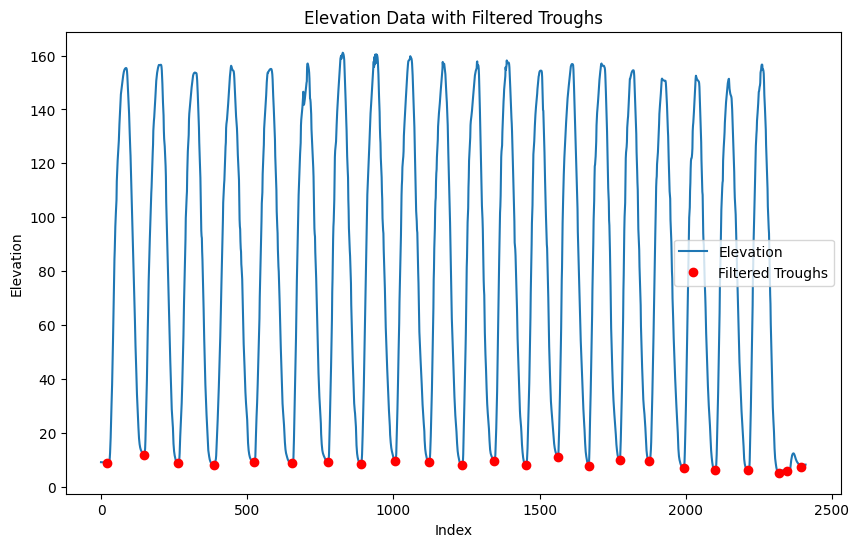

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.signal import find_peaks

# Filter troughs based on elevation value and proximity
def filter_troughs(troughs, elev_values, proximity_threshold):
    filtered_troughs = []
    last_index = None
    for index in troughs:
        if last_index is None or index - last_index > proximity_threshold:
            if elev_values[index] < 25:
                filtered_troughs.append(index)
            last_index = index
    return filtered_troughs

# Find troughs in the "elev" column
elev_values = kin_df_new['elev'].values
troughs, _ = find_peaks(-elev_values)

# Filter and select relevant troughs
proximity_threshold = 25  # Define the proximity threshold (adjust as needed)
filtered_troughs = filter_troughs(troughs, elev_values, proximity_threshold)

# Plotting the elev values and troughs
plt.figure(figsize=(10, 6))
plt.plot(elev_values, label='Elevation')
plt.plot(filtered_troughs, elev_values[filtered_troughs], 'ro', label='Filtered Troughs')
plt.xlabel('Index')
plt.ylabel('Elevation')
plt.title('Elevation Data with Filtered Troughs')
plt.legend()
plt.show()



In [17]:
# get the first 500 rows of the mp_df_new dataframe
mp_df_new_500 = mp_df_new.iloc[:100]

# print as a list
print(mp_df_new_500['elev'].values.tolist())

[15.29, 15.24, 15.19, 15.07, 15.01, 15.02, 15.04, 15.05, 15.07, 14.99, 14.76, 14.48, 14.17, 14.02, 14.02, 14.02, 14.02, 14.38, 14.42, 14.43, 14.46, 14.51, 14.05, 13.84, 14.28, 23.88, 27.4, 39.71, 56.31, 74.26, 85.58, 97.02, 103.81, 114.9, 122.57, 129.77, 136.9, 139.9, 143.18, 147.35, 147.1, 147.31, 148.27, 148.67, 144.27, 138.92, 123.96, 111.68, 98.39, 88.94, 80.04, 61.88, 53.0, 45.47, 38.13, 26.27, 26.48, 16.02, 18.08, 14.16, 16.14, 19.83, 18.5, 23.61, 47.39, 60.92, 76.69, 86.17, 97.99, 106.65, 118.9, 126.15, 133.65, 142.31, 151.17, 152.23, 153.05, 153.31, 154.29, 155.06, 151.51, 145.5, 135.57, 121.56, 107.18, 100.84, 85.53, 70.88, 61.07, 42.43, 34.7, 34.99, 22.27, 15.94, 9.0, 7.91, 4.68, 18.29, 25.39, 28.5]


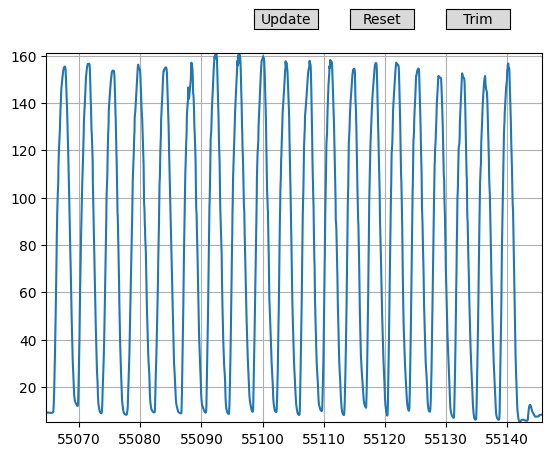

In [21]:
import matplotlib.pyplot as plt
import StartEndSelector as SES 

# new data frame with time and elev columns named as x and y
data = pd.DataFrame({'x': kin_df_new['time'], 'y': kin_df_new['elev']})
# data.head()

plot_selector = SES.PlotSelector(data)
plot_selector.show()


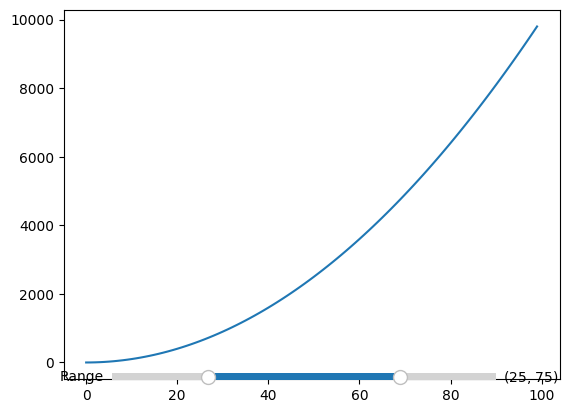

In [23]:
import matplotlib.pyplot as plt
from matplotlib.widgets import RangeSlider

# Create a figure and axis
fig, ax = plt.subplots()

# Generate some data
x = range(100)
y = [i**2 for i in x]

# Plot the data
line, = ax.plot(x, y)

# Create a RangeSlider
slider_ax = fig.add_axes([0.2, 0.1, 0.6, 0.03])
slider = RangeSlider(slider_ax, 'Range', 0, 100, valinit=(25, 75))

# Update the plot based on the slider values
def update(val):
    start, end = slider.val
    line.set_xdata(x[start:end+1])
    line.set_ydata(y[start:end+1])
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()